In [1]:
import pandas as pd

In [2]:
# Read the CSV file

file_path = r"C:\Users\Damidee\OneDrive\Documents\DATA ANALYSIS BOOTCAMP\MY PERSONAL PROJECT\AIRBnB LISTING ANALYSIS WITH PYTHON\Listings.csv"
listings = pd.read_csv(file_path, low_memory=False, encoding="ISO-8859-1")

#Display the first few rows of the dataframe to understand its structure
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
# Overview of the dataset
overview = listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
# Convert date columns to datetime format
date_columns = ['host_since']

for column in date_columns:
    listings[column] = pd.to_datetime(listings[column], errors='coerce')

# Verify the conversion
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
# Filter data for rows where the city is Paris and keep only the specified columns
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
# Check for missing values in the filtered Paris data
paris_missing_values = paris_listings.isnull().sum()

paris_missing_values

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [7]:
# Calculate minimum, maximum, and average for each numeric field
paris_numeric_summary = paris_listings.describe().loc[['min', 'max', 'mean']]

paris_numeric_summary

,accommodates,price
min,0.000000,0.000000
max,16.000000,12000.000000
mean,3.037997,113.096445


In [8]:
# Count how many times the value equals zero
paris_listings.query("accommodates == 0 or price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [9]:
# Group by 'neighbourhood' and calculate the mean price
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().reset_index()

# Sort the table by mean price in ascending order
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price')

paris_listings_neighbourhood.head()

,neighbourhood,price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459


In [10]:
# Identify the most expensive neighborhood
most_expensive_neighbourhood = paris_listings_neighbourhood.iloc[-1]['neighbourhood']

# Filter down to the most expensive neighborhood
expensive_neighbourhood_data = paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood]

# Group by 'accommodates' and calculate the mean price
paris_listings_accommodations = expensive_neighbourhood_data.groupby('accommodates')['price'].mean().reset_index()

# Sort the table by mean price in ascending order
paris_listings_accommodations = paris_listings_accommodations.sort_values(by='price')

paris_listings_accommodations.head()

,accommodates,price
0,0,0.000000
1,1,79.522222
3,3,152.828767
2,2,155.103352
4,4,212.096070


In [11]:
# Extract the year from 'host_since'
paris_listings['host_since_year'] = paris_listings['host_since'].dt.year

# Group by 'host_since_year' and calculate the average price and count of rows
paris_listings_over_time = paris_listings.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    number_of_new_hosts=('host_since_year', 'count')
).reset_index()

paris_listings_over_time.head()

,host_since_year,average_price,number_of_new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

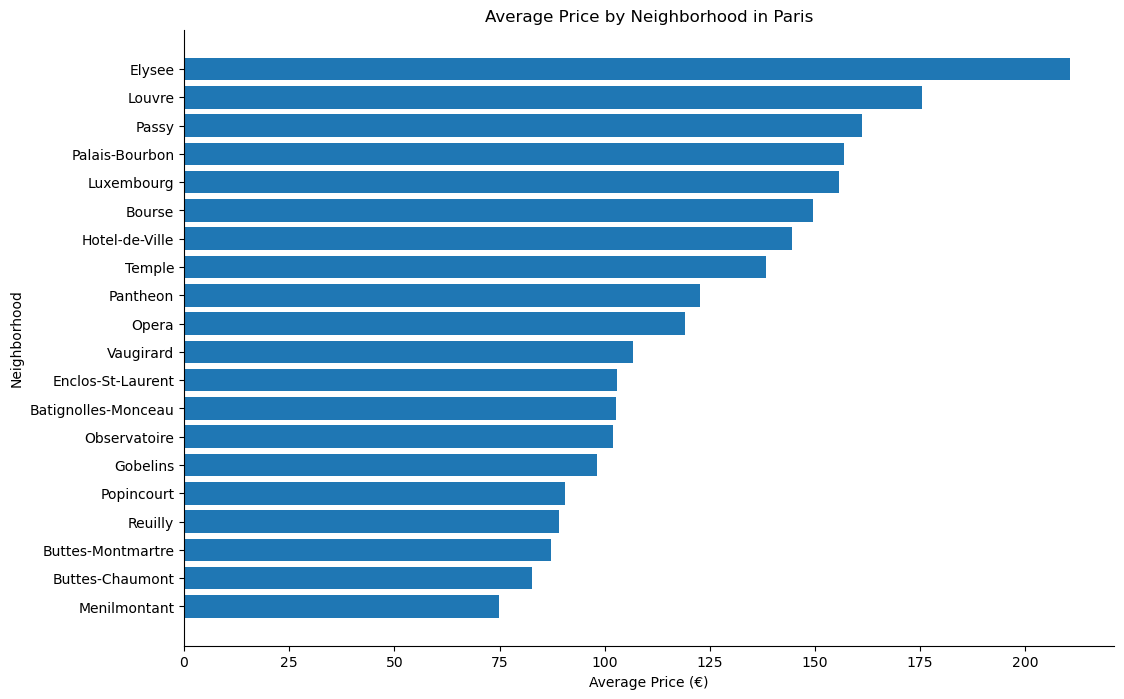

In [13]:
# Create a horizontal bar chart for the average price by neighborhood
plt.figure(figsize=(12, 8))
plt.barh(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'])
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')
plt.title('Average Price by Neighborhood in Paris')
sns.despine()
plt.show()

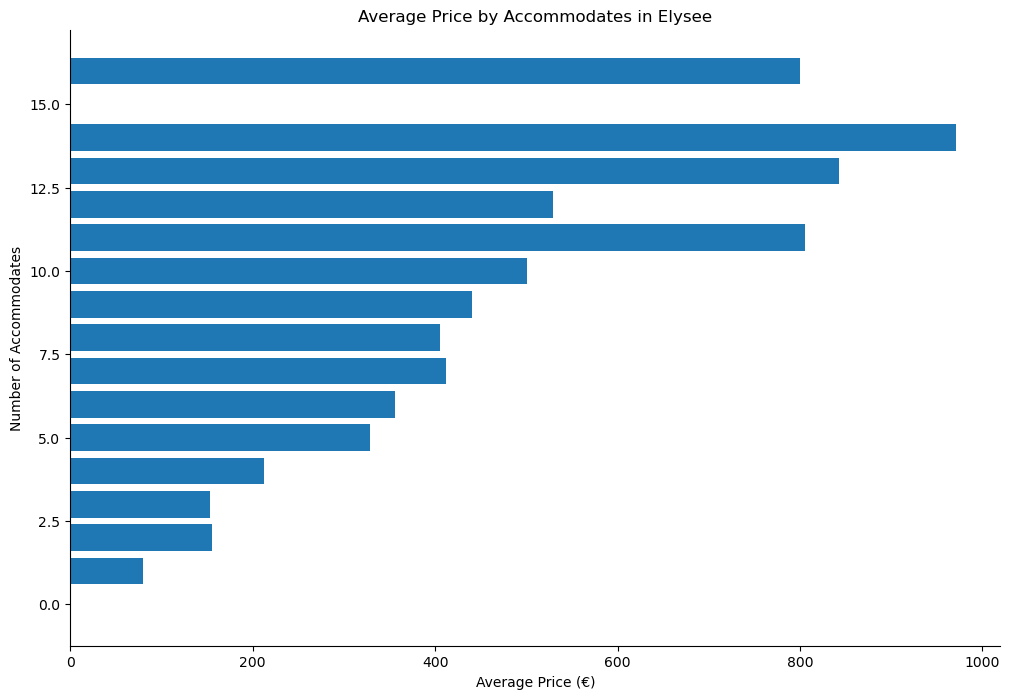

In [14]:
# Create a horizontal bar chart for the average price by 'accommodates' in the most expensive neighborhood
plt.figure(figsize=(12, 8))
plt.barh(paris_listings_accommodations['accommodates'], paris_listings_accommodations['price'])
plt.xlabel('Average Price (€)')
plt.ylabel('Number of Accommodates')
plt.title(f'Average Price by Accommodates in {most_expensive_neighbourhood}')
sns.despine()
plt.show()

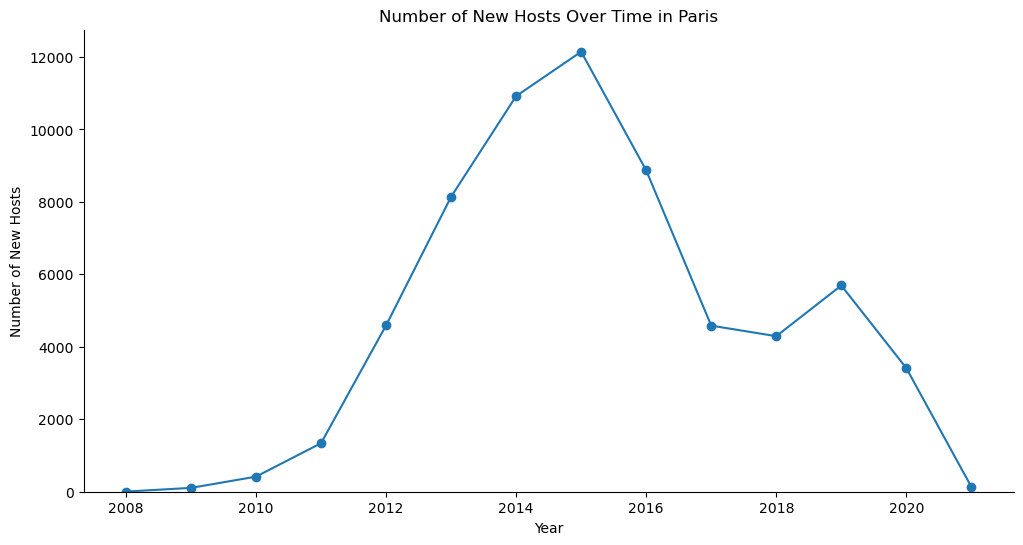

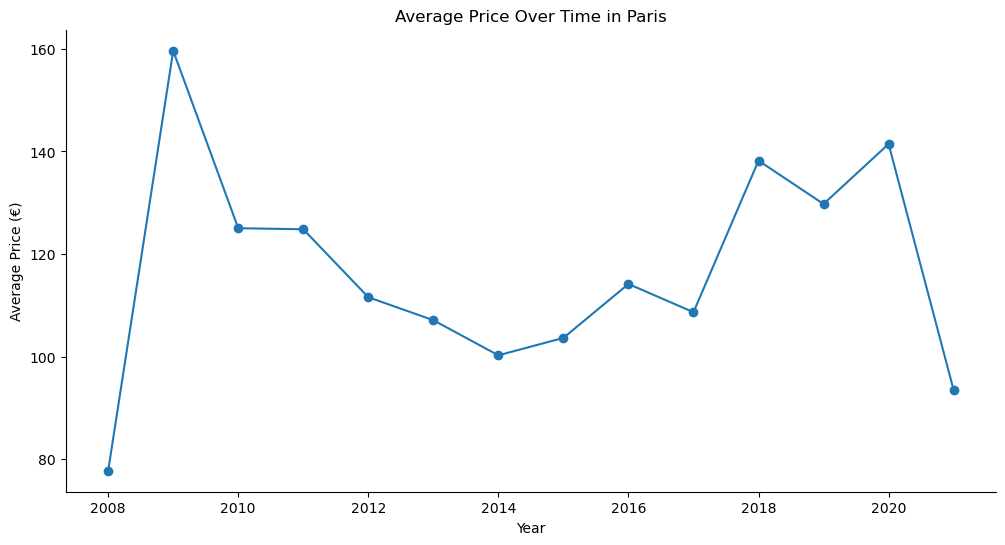

In [15]:
# Create line chart for the count of new hosts over time
plt.figure(figsize=(12, 6))
plt.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['number_of_new_hosts'], marker='o')
plt.ylim(0)
plt.xlabel('Year')
plt.ylabel('Number of New Hosts')
plt.title('Number of New Hosts Over Time in Paris')
sns.despine()
plt.show()

# Create line chart for the average price over time
plt.figure(figsize=(12, 6))
plt.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], marker='o')
#plt.ylim(0)
plt.xlabel('Year')
plt.ylabel('Average Price (€)')
plt.title('Average Price Over Time in Paris')
sns.despine()
plt.show()

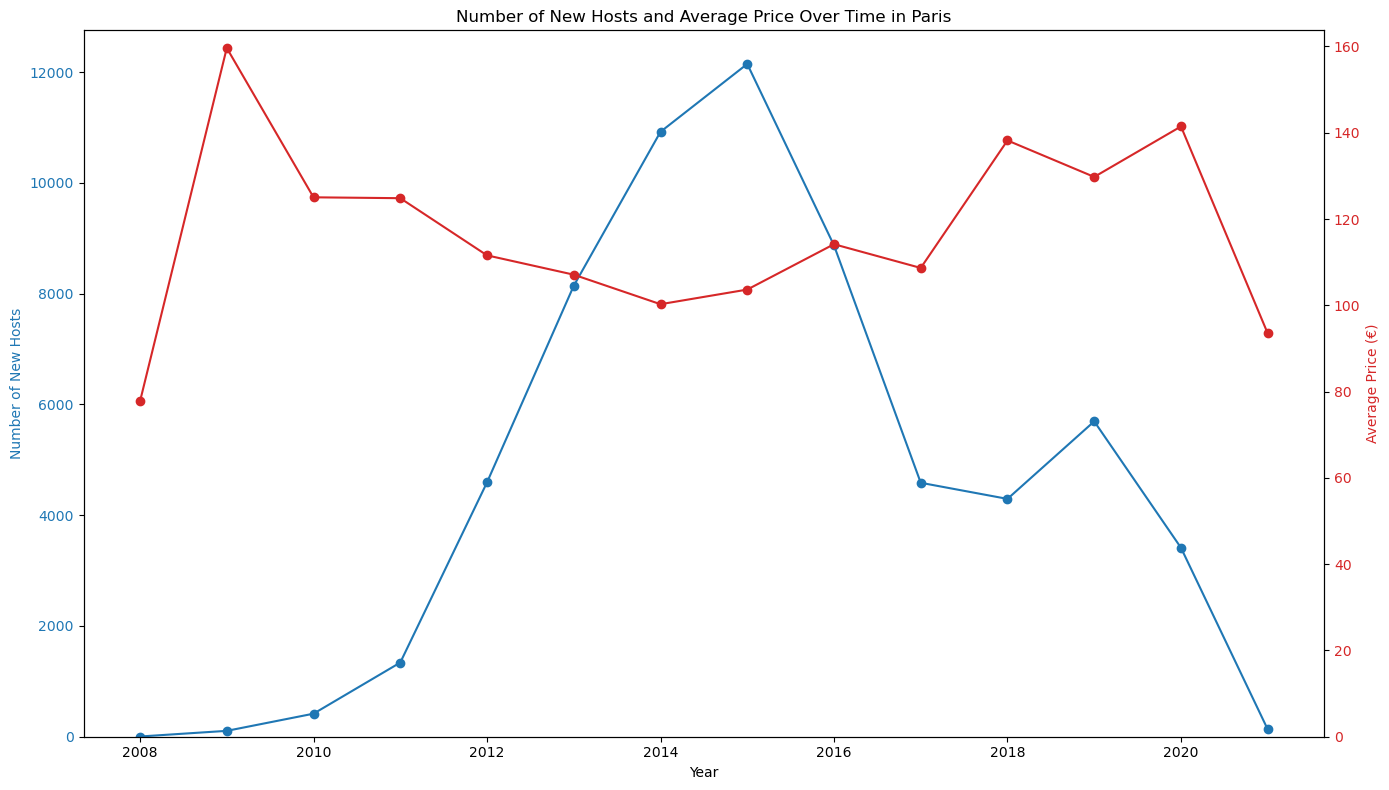

In [16]:
# Create a dual axis line chart to show both new hosts and average price over time
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot number of new hosts
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of New Hosts', color=color)
ax1.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['number_of_new_hosts'], color=color, marker='o', label='Number of New Hosts')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0)  # Set y-axis limit to 0

# Create a second y-axis for the average price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price (€)', color=color)
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], color=color, marker='o', label='Average Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0)  # Set y-axis limit to 0

# Add title
plt.title('Number of New Hosts and Average Price Over Time in Paris')

# Display the chart
fig.tight_layout()
plt.show()

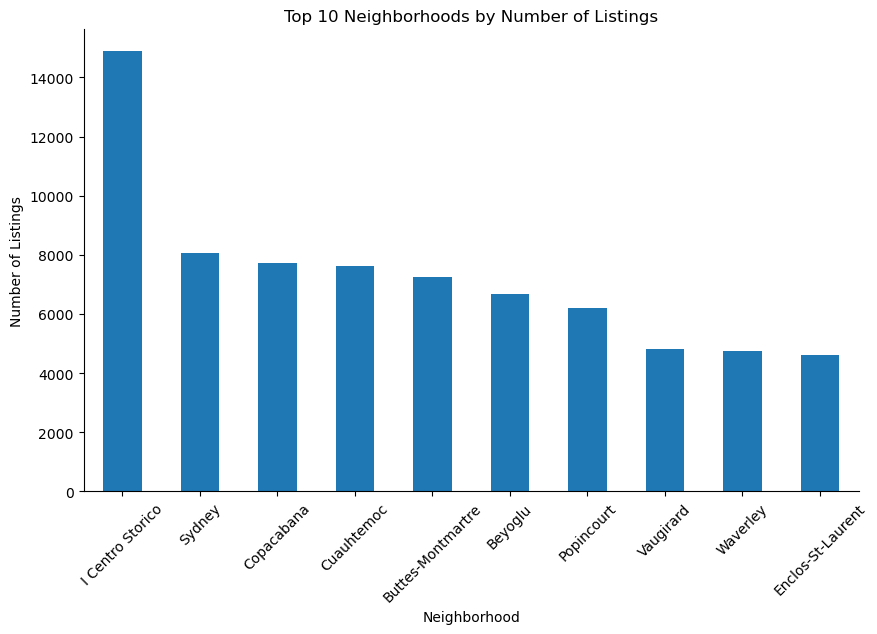

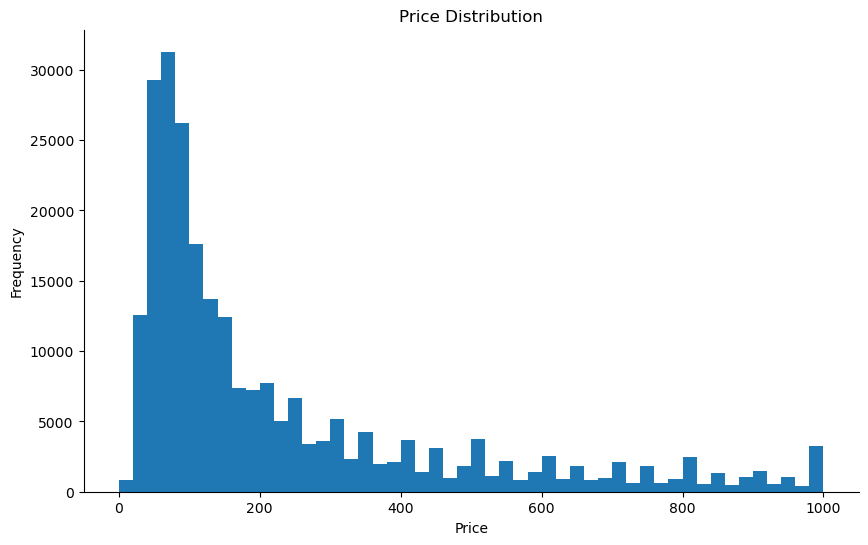

In [17]:
# Listings by Neighborhood
top_neighborhoods = listings['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
#plt.grid(True)
sns.despine()
plt.show()

# Price Distribution
plt.figure(figsize=(10, 6))
listings['price'].plot(kind='hist', bins=50, range=(0, 1000))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.grid(True)
sns.despine()
plt.show()

# Listing Analysis

1. Distribution of Listings by Neighborhood
The bar chart shows the top 10 neighborhoods with the most listings. These neighborhoods are likely popular or central locations with a high demand for Airbnb rentals.

2. Price Distribution
The histogram of price distribution shows most listings fall within a lower price range. There are some high outliers, which might be luxury listings or incorrectly entered data.

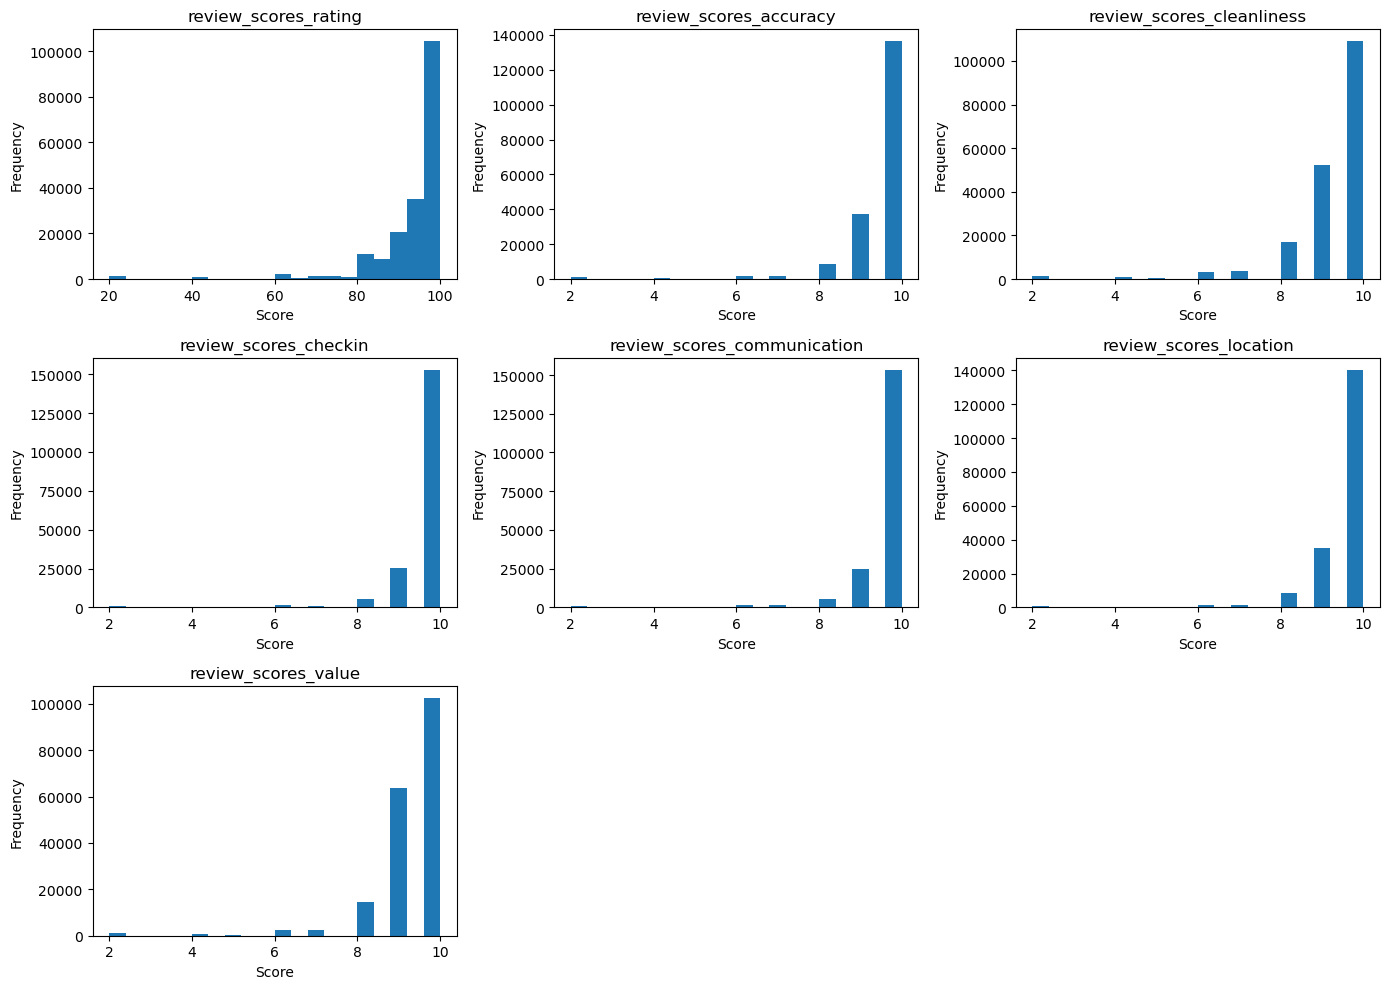

In [18]:
# Summary of Review Scores
review_scores_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Distribution of Review Scores
plt.figure(figsize=(14, 10))
for i, column in enumerate(review_scores_columns, 1):
    plt.subplot(3, 3, i)
    listings[column].dropna().plot(kind='hist', bins=20)
    plt.title(column)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    #plt.grid(True)
plt.tight_layout()
plt.show()

# Review Scores Analysis

The histograms for various review scores show the distribution of ratings across different aspects such as accuracy, cleanliness, check-in process, communication, location, and value. Most scores are high (around 8-10), indicating that guests generally have positive experiences.

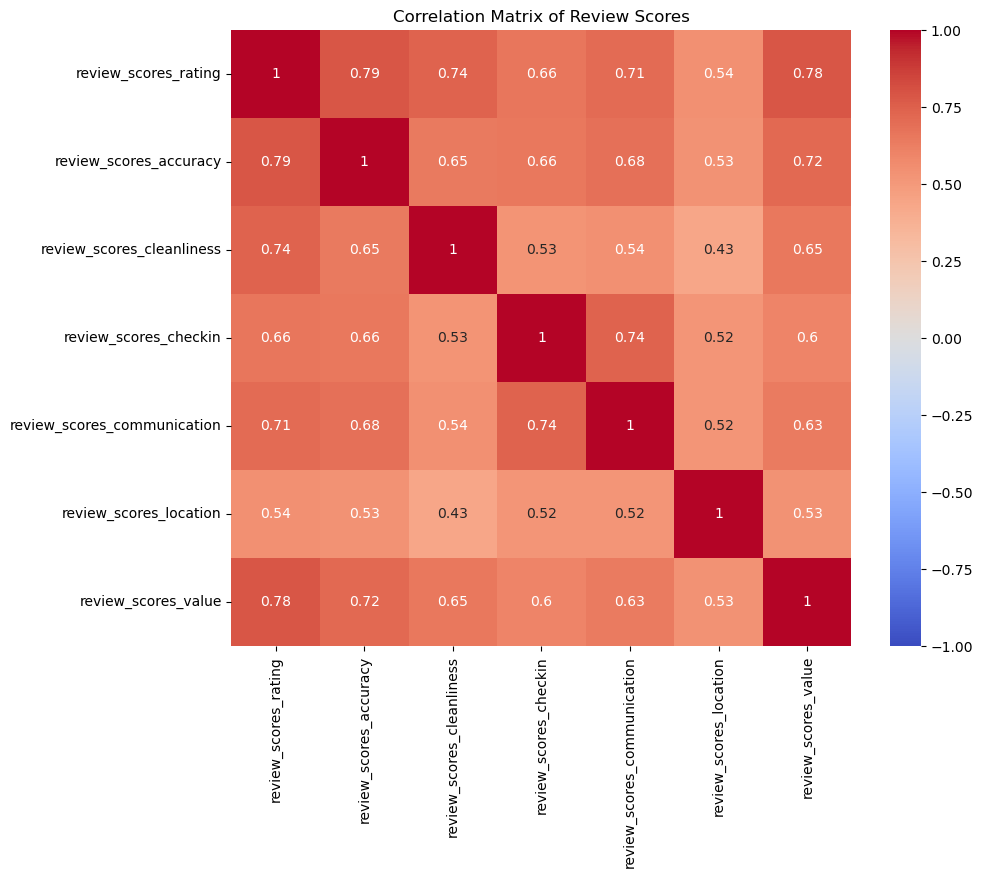

In [19]:
# Correlation Matrix
correlation_matrix = listings[review_scores_columns].corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Review Scores')
plt.show()

# Correlation Analysis

The heatmap of the correlation matrix shows the relationships between different review scores:

1. High positive correlations exist between most of the review scores, suggesting that properties receiving high ratings in one aspect tend to receive high ratings in other aspects as well.

2. The strongest correlations are between review_scores_rating and other scores such as review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, and review_scores_value.